In [87]:
import numpy as np
import scanpy as sc
import anndata
import scvi
from scib_metrics.benchmark import Benchmarker
import torch
import scib_metrics
from lightning.pytorch.callbacks import ModelCheckpoint
import copy

import sys
sys.path.append('..')
from functions import *
from SCVIModelCheckpoint import SCVIModelCheckpoint 
%matplotlib inline

In [2]:
adata = anndata.read_h5ad(filename="../data/adataLung4.h5ad")

In [4]:
adataMG, vaeMG = trainModel(adata, 'mixofgaus', checkpoint = True, checkpointFolder = "MG_LogLik", every_n=10, log=True, logname="MG_LogLik")

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: lightning_logs/MG_LogLik
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [13:13<00:00,  2.15s/it, v_num=0, train_loss_step=878, train_loss_epoch=899]    

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [13:14<00:00,  1.99s/it, v_num=0, train_loss_step=878, train_loss_epoch=899]


In [5]:
bmMG = getBenchmarkResultsEpochs(adata,"models/Final_MetEp_MG/",400,10)

INFO     File models/Final_MetEp_MG/epoch=9/model.pt already downloaded                                            
INFO     File models/Final_MetEp_MG/epoch=19/model.pt already downloaded                                           
INFO     File models/Final_MetEp_MG/epoch=29/model.pt already downloaded                                           
INFO     File models/Final_MetEp_MG/epoch=39/model.pt already downloaded                                           
INFO     File models/Final_MetEp_MG/epoch=49/model.pt already downloaded                                           
INFO     File models/Final_MetEp_MG/epoch=59/model.pt already downloaded                                           
INFO     File models/Final_MetEp_MG/epoch=69/model.pt already downloaded                                           
INFO     File models/Final_MetEp_MG/epoch=79/model.pt already downloaded                                           
INFO     File models/Final_MetEp_MG/epoch=89/model.pt already downloaded

Embeddings: 100%|██████████| 39/39 [12:22<00:00, 19.03s/it]


In [6]:
plotMetricsEpochs(bmMG,395,"MixtureOfGaussians",10)

In [ ]:
def plotBatchIntBioCons(bm,  max_epochs, name, n_eps = 10):
    benchmark_results = bm.get_results(min_max_scale=False)
    metrics = benchmark_results.keys()
    results = 
    metrics_results = []
    fig, axes = plt.subplots(1,1,figsize=(15,15))
    for i in range(3):
        metrics_results.append([])
        for j in range(int(max_epochs/n_eps)):
            metrics_results[i].append(benchmark_results[metrics[i]][f"scVIepoch={n_eps*j+n_eps-1}"])
        data = pd.DataFrame(metrics_results[i],index=np.linspace(n_eps-1,max_epochs-1, int(max_epochs/n_eps)))
        plot = sns.lineplot(data,ax=axes[i],legend=False)
        plot.set_title(metrics[i])
    fig.supxlabel('Epoch')
    plt.savefig(f"epoch_metrics/{name}")
    plt.show()

In [41]:
def makeDataFrame(name):
    df = pd.read_csv(f"{name}.csv")
    df = df.drop(["Step"],axis=1)
    return df

In [53]:
def plotMetricsEpochs(bm,  max_epochs, name, n_eps = 10):
    benchmark_results = bm.get_results(min_max_scale=False)
    metrics = benchmark_results.keys()
    print(metrics)
    metrics_results = []
    fig, axes = plt.subplots(1,3,figsize=(15,4))
    for i in range(2):
        metrics_results.append([])
        for j in range(int(max_epochs/n_eps)):
            metrics_results[i].append(benchmark_results[metrics[i+3]][f"scVIepoch={n_eps*j+n_eps-1}"])
        data = pd.DataFrame(metrics_results[i],index=np.linspace(n_eps-1,max_epochs-1, int(max_epochs/n_eps)))
        plot = sns.lineplot(data,ax=axes[i],legend=False)
        plot.set_title(metrics[i+3])
    df = makeDataFrame("MG_LogLik_version_0")
    plot1 = sns.lineplot(df[["Value"]],ax=axes[2])
    plot1.set(ylim = (None, df["Value"][10]))
    plot1.set_title("ELBO_Validation")
    fig.supxlabel('Epoch')
    plt.savefig(f"epoch_metrics/{name}")
    plt.show()

In [52]:
df = makeDataFrame("MG_LogLik_version_0")
df["Value"][10]

929.8461303710938

In [54]:
plotMetricsEpochs(bmMG, 379,"MG", 10)

Index(['Leiden NMI', 'Leiden ARI', 'KBET', 'Batch correction',
       'Bio conservation', 'Total'],
      dtype='object')


In [7]:
bm = bmMG
benchmark_results = bm.get_results(min_max_scale=False)

In [57]:
benchmark_results

,Leiden NMI,Leiden ARI,KBET,Batch correction,Bio conservation,Total
Embedding,,,,,,
scVIepoch=9,0.755608,0.587212,0.259259,0.259259,0.67141,0.506549
scVIepoch=19,0.773533,0.611798,0.270307,0.270307,0.692665,0.523722
scVIepoch=29,0.77275,0.659573,0.284236,0.284236,0.716162,0.543391
scVIepoch=39,0.764394,0.629644,0.305482,0.305482,0.697019,0.540404
scVIepoch=49,0.763906,0.596347,0.30629,0.30629,0.680127,0.530592
scVIepoch=59,0.767474,0.627897,0.319061,0.319061,0.697686,0.546236
scVIepoch=69,0.763671,0.606486,0.328483,0.328483,0.685078,0.54244
scVIepoch=79,0.762981,0.590462,0.330817,0.330817,0.676721,0.53836
scVIepoch=89,0.765127,0.63744,0.333744,0.333744,0.701284,0.554268


In [65]:
df = benchmark_results.drop("Metric Type")

In [67]:
df = df.set_index(np.linspace(9,389,39))

In [63]:
np.linspace(9,389,39)

array([  9.,  19.,  29.,  39.,  49.,  59.,  69.,  79.,  89.,  99., 109.,
       119., 129., 139., 149., 159., 169., 179., 189., 199., 209., 219.,
       229., 239., 249., 259., 269., 279., 289., 299., 309., 319., 329.,
       339., 349., 359., 369., 379., 389.])

In [58]:
benchmark_results["Batch correction"]

Embedding
scVIepoch=9             0.259259
scVIepoch=19            0.270307
scVIepoch=29            0.284236
scVIepoch=39            0.305482
scVIepoch=49             0.30629
scVIepoch=59            0.319061
scVIepoch=69            0.328483
scVIepoch=79            0.330817
scVIepoch=89            0.333744
scVIepoch=99            0.340881
scVIepoch=109           0.346972
scVIepoch=119           0.379208
scVIepoch=129           0.371664
scVIepoch=139           0.373723
scVIepoch=149           0.381481
scVIepoch=159           0.377436
scVIepoch=169           0.398156
scVIepoch=179           0.387612
scVIepoch=189           0.394144
scVIepoch=199           0.400036
scVIepoch=209           0.408206
scVIepoch=219           0.410322
scVIepoch=229           0.414785
scVIepoch=239           0.423168
scVIepoch=249           0.426541
scVIepoch=259            0.43061
scVIepoch=269           0.421142
scVIepoch=279           0.428765
scVIepoch=289           0.430911
scVIepoch=299           0.434217


In [78]:
df["ind"] = np.linspace(9,389,39)

In [84]:
import seaborn as sns

<Axes: xlabel='Batch correction', ylabel='Bio conservation'>

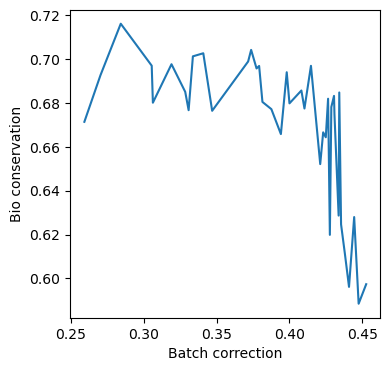

In [91]:
fig, axes = plt.subplots(1,1,figsize=(4,4))
sns.lineplot(data=df, x="Batch correction",y="Bio conservation")

In [ ]:
dfMG = pd.read_csv(f"Training_Losses_Times/Data/{metric}/mog{name}_version_0.csv")
df["MG"] = dfMG["Value"]

In [40]:
makeDataFrame("MG_LogLik_version_0")

,Wall time,Value
0,1.695287e+09,1114.393433
1,1.695287e+09,1020.339905
2,1.695287e+09,998.418701
3,1.695287e+09,982.640625
4,1.695287e+09,970.198792
...,...,...
395,1.695288e+09,881.673767
396,1.695288e+09,881.705994
397,1.695288e+09,881.745728
398,1.695288e+09,881.529602
